# Gradient of Image

## import library

In [1530]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors

## load input image ('test.jpeg')

In [1531]:
I0 = img.imread('test.jpeg')

## check the size of the input image

In [1532]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

num_row     = I0.shape[0]
num_column  = I0.shape[1]
num_channel = I0.ndim

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++
print('number of rows of I0 = ', num_row)
print('number of columns of I0 = ', num_column)
print('number of channels of I0 = ', num_channel)

number of rows of I0 =  510
number of columns of I0 =  512
number of channels of I0 =  3


## convert the color image into a gray image
- take the average of the input image with 3 channels with respect to the channels into an image with 1 channel

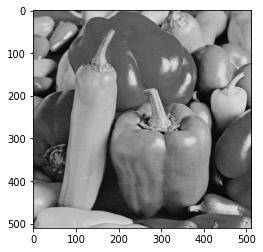

number of rows of I =  510
number of columns of I =  512


In [1533]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
# 

I0_array = np.array(I0)

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

I = rgb2gray(I0)

plt.imshow(I, cmap = plt.get_cmap('gray'))

plt.savefig('graytest.jpeg')
plt.show()

num_row = I.shape[0]
num_column = I.shape[1]

I_array = np.array(I)
I_array_reshaped = I_array.reshape((510, 512, 1))


#
# ++++++++++++++++++++++++++++++++++++++++++++++++++
print('number of rows of I = ', num_row)
print('number of columns of I = ', num_column)

## normalize the converted image
- normalize the converted grey scale image so that its maximum value is 1 and its minimum value is 0

In [1534]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

I *= (1.0/I.max())

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('maximum value of I = ', np.max(I))
print('minimum value of I = ', np.min(I))

maximum value of I =  1.0
minimum value of I =  0.0


## define a function to compute the derivative of input matrix in x(row)-direction

- forward difference : $ I[x+1, y] - I[x, y] $ 

In [1535]:
def compute_derivative_x_forward(I):
    
    D = np.zeros(I.shape)
    
#     # ++++++++++++++++++++++++++++++++++++++++++++++++++
#     # complete the blanks
#     #  
    
    Ix = I[:, 0 : -1]
    Ixplus1 = np.append(I[:, 1 : I.shape[1]-1], I[:, I.shape[1]-2 : I.shape[1]-1], axis = 1)
    D = Ixplus1 - Ix
                 

#     #
#     # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D


index 510 is out of bounds for axis 0 with size 510

- backward difference : $ I[x, y] - I[x-1, y] $ 

In [1536]:
def compute_derivative_x_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    Ix = I[:, 0 : -1]
    Ixminus1 = np.roll(np.append(I[:, 0:I.shape[1]-2], I[:, 0:1], axis = 1), 1, axis = 1) 
    D = Ix - Ixminus1
    
    
    # D[1:-1] =  ((1.0)*I[2:] 
    #                    +(1.0)*I[:-2]
    #                    -(2.0)*I[1:-1])
    # for x in range(I.shape[0]):
    #     for y in range(I.shape[1]):
    #         if (x < I.shape[0]-1):
    #             D[x][y] = I[x][y] - I[x-1][y]
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- central difference : $ \frac{1}{2} \left( I[x+1, y] - I[x-1, y] \right)$ 

In [1537]:
def compute_derivative_x_central(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    Ix = I[:, 0 : -1]
    Ixplus1 = np.append(I[:, 1 : I.shape[1]-1], I[:, I.shape[1]-2 : I.shape[1]-1], axis = 1)
    Ixminus1 = np.append(I[:, 1 : I.shape[1]-1], I[:,0 : 1], axis = 1)
    D = 0.5*(Ixplus1 - Ixminus1)
    
    # D[1:-1] =  ((1.0)*I[2:] 
    #                    +(1.0)*I[:-2]
    #                    -(2.0)*I[1:-1])
    # for x in range(I.shape[0]-1):
    #     for y in range(I.shape[1]):
    #         D[x][y]=(I[x+1][y]-I[x-1][y])/2

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

## define a function to compute the derivative of input matrix in y(column)-direction

- forward difference : $ I[x, y+1] - I[x, y] $ 

In [1538]:
def compute_derivative_y_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    Iy = I[0 : -1 , :]
    Iyplus1 = np.append(I[1 : I.shape[0]-1, :], I[I.shape[0]-2 : I.shape[1]-1, :], axis = 0)
    D = Iyplus1 - Iy    
    
# D[1:-1] =  ((1.0)*I[2:] 
    #                    +(1.0)*I[:-2]
    #                    -(2.0)*I[1:-1])
    # for y in range(I.shape[1]):
    #     for x in range(I.shape[0]):
    #         if (y < 0):
    #             D[x][y] = I[x][y+1] - I[x][y]
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- backward difference : $ I[x, y] - I[x, y-1] $ 

In [1539]:
def compute_derivative_y_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    Iy = I[0:-1, :]
    Iyminus1 = np.roll(np.append(I[0:I.shape[0]-2 ,:], I[0:1 ,:], axis = 0), 1, axis = 0) 
    D = Iy - Iyminus1
    
    # D[1:-1] =  ((1.0)*I[2:] 
    #                    +(1.0)*I[:-2]
    #                    -(2.0)*I[1:-1])
    # for y in range(I.shape[1]):
    #     for x in range(I.shape[0]):
    #         if (y < I.shape[1]-1):
    #             D[x][y] = I[x][y] - I[x][y-1]
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- central difference : $ \frac{1}{2} \left( I[x, y+1] - I[x, y-1] \right)$ 

In [1540]:
def compute_derivative_y_central(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    D[1:-1] =  ((1.0)*I[2:] 
                       +(1.0)*I[:-2]
                       -(2.0)*I[1:-1])
    for y in range(I.shape[1]-1):
        for x in range(I.shape[0]):
            D[x][y]=(I[x][y+1]-I[x][y-1])/2
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

## compute the norm of the gradient of the input image 

- $L_2^2$-norm of the gradient $ \left( \frac{\partial I}{\partial x}, \frac{\partial I}{\partial y} \right) $ is defined by $ \left( \frac{\partial I}{\partial x} \right)^2 + \left( \frac{\partial I}{\partial y} \right)^2 $

In [1541]:
def compute_norm_gradient_central(I):
    
    norm_gradient = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    norm_gradient[1:-1] =  ((1.0)*I[2:] 
                       +(1.0)*I[:-2]
                       -(2.0)*I[1:-1])
    for x in np.arange(I.shape[0]):
        for y in np.arange(I.shape[1]):
            norm_gradient = norm_gradient + np.sum(np.power(np.abs(I[x, y]), 2))
    
    np.sqrt(norm_gradient)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return norm_gradient

___

## functions for presenting the results

___

___

In [1542]:
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I0)
    plt.show()

In [1543]:
def function_result_02():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I, cmap='gray', vmin=0, vmax=1, interpolation='none')
    plt.show()

In [1544]:
def function_result_03():

    D = compute_derivative_x_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [1545]:
def function_result_04():

    D = compute_derivative_x_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [1546]:
def function_result_05():

    D = compute_derivative_x_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [1547]:
def function_result_06():

    D = compute_derivative_y_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [1548]:
def function_result_07():

    D = compute_derivative_y_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [1549]:
def function_result_08():

    D = compute_derivative_y_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [1550]:
def function_result_09():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [1551]:
def function_result_10():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    im = plt.imshow(D, cmap=cm.jet, norm=colors.LogNorm())
    plt.colorbar(im)
    plt.show()

In [1552]:
def function_result_11():

    D = compute_derivative_x_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [1553]:
def function_result_12():

    D = compute_derivative_x_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [1554]:
def function_result_13():

    D = compute_derivative_x_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [1555]:
def function_result_14():

    D = compute_derivative_y_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [1556]:
def function_result_15():

    D = compute_derivative_y_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [1557]:
def function_result_16():

    D = compute_derivative_y_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [1558]:
def function_result_17():

    D = compute_norm_gradient_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


___

___

# results

___

___

**************************************************
## [RESULT 01]
**************************************************


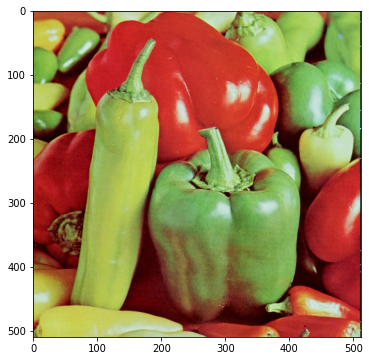

**************************************************
## [RESULT 02]
**************************************************


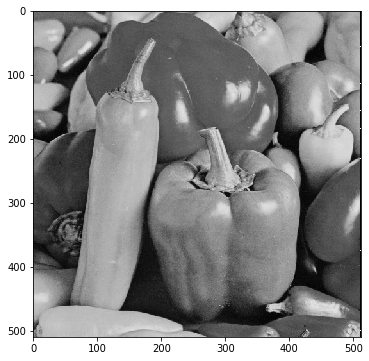

**************************************************
## [RESULT 03]
**************************************************


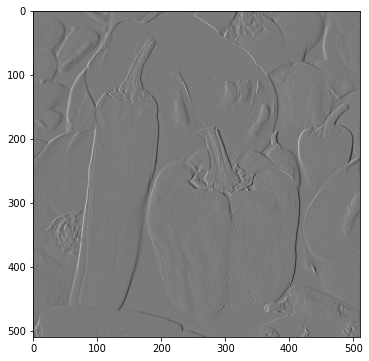

**************************************************
## [RESULT 04]
**************************************************


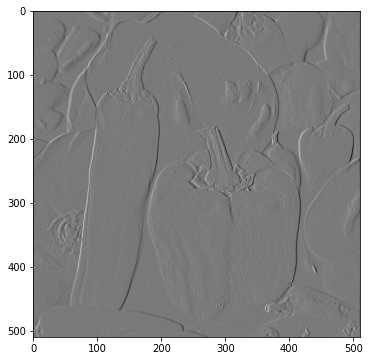

**************************************************
## [RESULT 05]
**************************************************


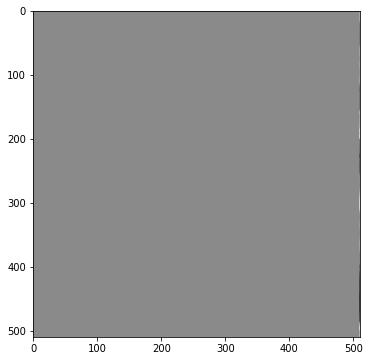

**************************************************
## [RESULT 06]
**************************************************


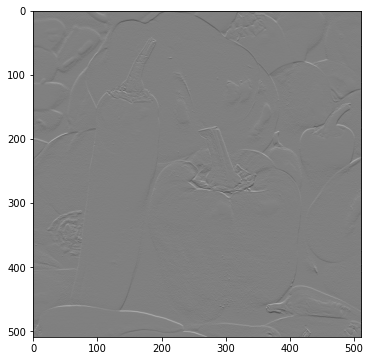

**************************************************
## [RESULT 07]
**************************************************


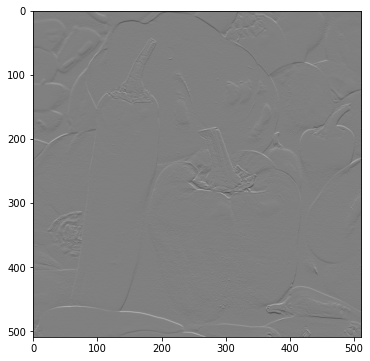

**************************************************
## [RESULT 08]
**************************************************


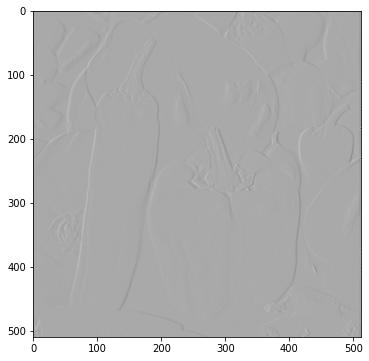

**************************************************
## [RESULT 09]
**************************************************


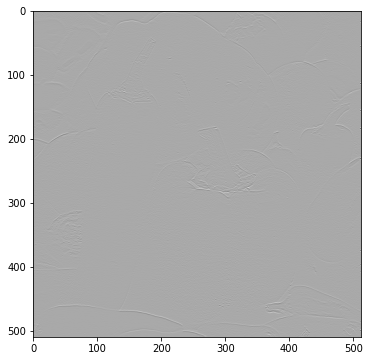

**************************************************
## [RESULT 10]
**************************************************


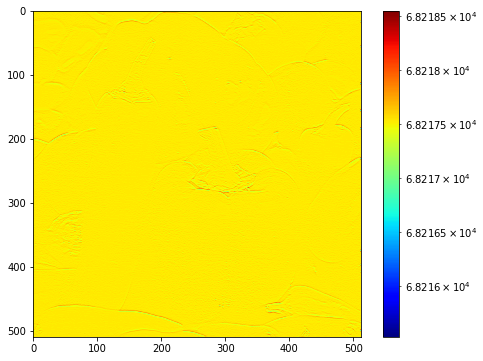

**************************************************
## [RESULT 11]
**************************************************
value1 =  -0.0370213674236361
value2 =  0.0
value3 =  -0.005530526524420487
value4 =  0.001772360326571687
**************************************************
## [RESULT 12]
**************************************************
value1 =  0.0
value2 =  -0.0663243914896211
value3 =  0.00215351308497419
value4 =  0.013001120589109683
**************************************************
## [RESULT 13]
**************************************************
value1 =  0.0
value2 =  0.11060100166944906
value3 =  0.0
value4 =  0.0
**************************************************
## [RESULT 14]
**************************************************
value1 =  -0.009540253542814958
value2 =  0.0022792934952470256
value3 =  0.0034608670462948354
value4 =  0.013466126954360724
**************************************************
## [RESULT 15]
**************************************************
valu

In [1529]:
number_result = 17

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)